You work in a news agency & are responsible for identifying the most
important topic for writing articles by your content team. Develop a
Jupyter Notebook which on executing every time shows top 10 Twitter
trending topics in India in the last 24 hours. Hints: Connecting with Twitter
API. Bringing Dashboard-like behaviour in Jupyter notebook. Please note:
Visualisation is mandatory. You will receive 0 marks if you do not add
visualisation.

In [1]:
import tweepy 
import sys 
import pandas as pd 
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')




In [2]:
# initialize api instance
consumer_key= '5Y0COk105m3rPpc5IA9lGyU9o'
consumer_secret= 'KPTlYweV1H13m3h1MMORVvQ3rqBCAKAltiMhnnWaWlX8h9bSII'
access_token='1303595051524612097-k5DnRVCMJQbeS2P6vpl74SKSXameo9'

access_token_secret ='0yAZPfI9tuDpcvOCfvXZ066M6uuNMuZBE0gXytpa0ikCG'


In [3]:
#Connect to Twitter through the API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit=True) 

In [4]:
api.available_trends()[0]

{'name': 'Worldwide',
 'placeType': {'code': 19, 'name': 'Supername'},
 'url': 'http://where.yahooapis.com/v1/place/1',
 'parentid': 0,
 'country': '',
 'woeid': 1,
 'countryCode': None}

In [5]:
for val in api.available_trends():
    if val['country'] == 'India':
        print(val.keys())
        break

dict_keys(['name', 'placeType', 'url', 'parentid', 'country', 'woeid', 'countryCode'])


In [6]:
for val in api.available_trends():
    if val['country'] == 'India':
        print(val.values())
        break

dict_values(['Nagpur', {'code': 7, 'name': 'Town'}, 'http://where.yahooapis.com/v1/place/2282863', 23424848, 'India', 2282863, 'IN'])


In [7]:
def get_woeid(place):
    '''Get woeid by location'''
    try:
        trends = api.available_trends()
        for val in trends:
            if (val['name'].lower() == place.lower()):
                return(val['woeid']) 
        print('Location Not Found')
    except Exception as e:
        print('Exception:',e)
        return(0)

In [8]:
get_woeid('India')

23424848

In [9]:
def top_ten_trends(loc_id,count):
    '''Get Trending Tweets by Location'''
    try:
        trends = api.get_place_trends(loc_id)
        df = pd.DataFrame([trending['name'],  trending['tweet_volume']] for trending in trends[0]['trends'] )
        df.columns = ['Trending_topic','_tweet_Volume_of_topic']
        df = df.sort_values('_tweet_Volume_of_topic', ascending = False)
        return(df[:count])
    except Exception as e:
        print("An exception occurred",e)


In [10]:
india_trends = top_ten_trends(23424848, 10)
india_trends

,Trending_topic,_tweet_Volume_of_topic
7,MIGHTY WINNER SHIV,590363.0
9,HAQ SE WINNER MC STAN,542976.0
22,Sant Rampal Ji Maharaj App,310537.0
25,Coldplay,154187.0
34,ज्ञान अमृत,147801.0
43,पवित्र पुस्तक गीता,137779.0
47,Matru Pitru Pujan Diwas,86689.0
42,F-22,85364.0
23,seokjin,61483.0
26,Kashmir Solidarity Day,54094.0


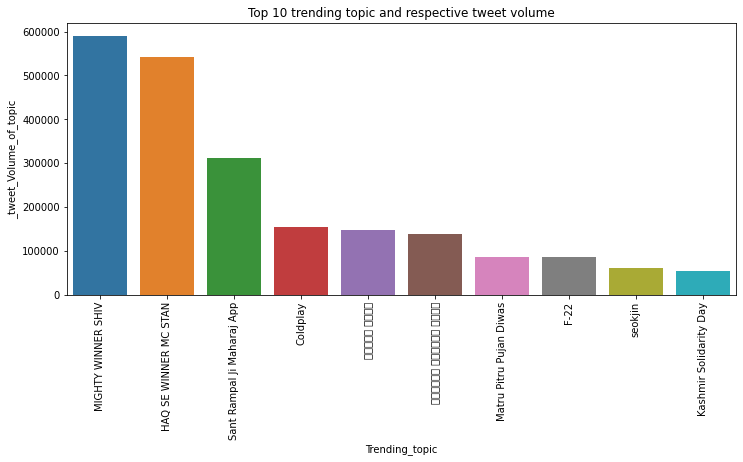

In [11]:


plt.figure(figsize=(12,5))
sns.barplot(x='Trending_topic',y='_tweet_Volume_of_topic',data=india_trends,ci=None)
plt.title("Top 10 trending topic and respective tweet volume")
plt.xticks(rotation='vertical')
plt.show()
